# Neural network 8 emotions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, callbacks, activations, regularizers
import numpy as np

2023-06-19 17:34:43.874826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
def plot_results(hist):
  fig, axs = plt.subplots(1, 2, figsize=(25, 8))
  axs[0].plot(hist.history['loss'], label='loss')
  axs[0].plot(hist.history['val_loss'], label='val_loss')
  axs[1].plot(hist.history['accuracy'], label='accuracy')
  axs[1].plot(hist.history['val_accuracy'], label='val_accuracy')

  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Loss')
  axs[0].legend()
  axs[0].grid(True)

  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Accuracy')
  axs[1].legend()
  axs[1].grid(True)

Load and scale data
Change labels to numerical values
Remove highly correlated features
Create train, validation and test splits

In [4]:
# loading the data
dataset = pd.read_csv('../dataset/labeled_8_combined_dataset.csv', index_col=0)

# getting unique labels
unique_labels = np.unique(dataset['LABEL'])
unique_labels

array(['Ekscytacja', 'Neutralna', 'Odprezenie', 'Radosc', 'Smutek',
       'Wstret', 'Zdziwienie', 'Zlosc'], dtype=object)

In [5]:
# changing labels to numerical
dataset.loc[dataset['LABEL'] == 'Ekscytacja', 'LABEL'] = 0.0
dataset.loc[dataset['LABEL'] == 'Neutralna', 'LABEL'] = 1.0
dataset.loc[dataset['LABEL'] == 'Odprezenie', 'LABEL'] = 2.0
dataset.loc[dataset['LABEL'] == 'Radosc', 'LABEL'] = 3.0
dataset.loc[dataset['LABEL'] == 'Smutek', 'LABEL'] = 4.0
dataset.loc[dataset['LABEL'] == 'Wstret', 'LABEL'] = 5.0
dataset.loc[dataset['LABEL'] == 'Zdziwienie', 'LABEL'] = 6.0
dataset.loc[dataset['LABEL'] == 'Zlosc', 'LABEL'] = 7.0

In [6]:
# separating data and labels
data = dataset.iloc[:, :-4]
labels = dataset.iloc[:, -1]
labels = np.asarray(labels).astype('float32')

# scaling the data
data_scaled = StandardScaler().fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# creating train, validation and test splits
d, data_test, l, labels_test = train_test_split(data_scaled, labels, test_size=0.1, random_state=0, stratify=labels)
data_train, data_validation, labels_train, labels_validation = train_test_split(d, l, test_size=0.1, random_state=0, stratify=l)

In [7]:
BaseDense = partial(
    layers.Dense,
    kernel_initializer="he_normal",
    kernel_regularizer=tf.keras.regularizers.l2(0.001),
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=96, restore_best_weights=True)
reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=32)

# ECG

Extract only ecg related features

In [8]:
ecg_columns = [col for col in data.columns if 'ECG' in col or 'HRV' in col]

ecg_data_train = data_train[ecg_columns]
ecg_data_validation = data_validation[ecg_columns]
ecg_data_test = data_test[ecg_columns]

Define the model and train it

Epoch 1/1000


2023-06-19 17:34:45.532694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 17:34:46.079482: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1
2023-06-19 17:34:46.965504: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f06b5f48e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-19 17:34:46.965566: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2023-06-19 17:34:47.028802: I tensorflow/compiler/

134/134 [==============================] - 2s 4ms/step - loss: 3.3463 - accuracy: 0.1883 - val_loss: 2.9765 - val_accuracy: 0.2019 - lr: 0.1000
Epoch 2/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.7544 - accuracy: 0.1938 - val_loss: 2.5821 - val_accuracy: 0.1977 - lr: 0.1000
Epoch 3/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.4435 - accuracy: 0.2015 - val_loss: 2.3453 - val_accuracy: 0.1987 - lr: 0.1000
Epoch 4/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.2640 - accuracy: 0.2084 - val_loss: 2.2107 - val_accuracy: 0.1966 - lr: 0.1000
Epoch 5/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.1604 - accuracy: 0.2125 - val_loss: 2.1489 - val_accuracy: 0.1861 - lr: 0.1000
Epoch 6/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.0996 - accuracy: 0.2048 - val_loss: 2.0935 - val_accuracy: 0.1977 - lr: 0.1000
Epoch 7/1000
134/134 [==============================] - 0s 3ms/step - l

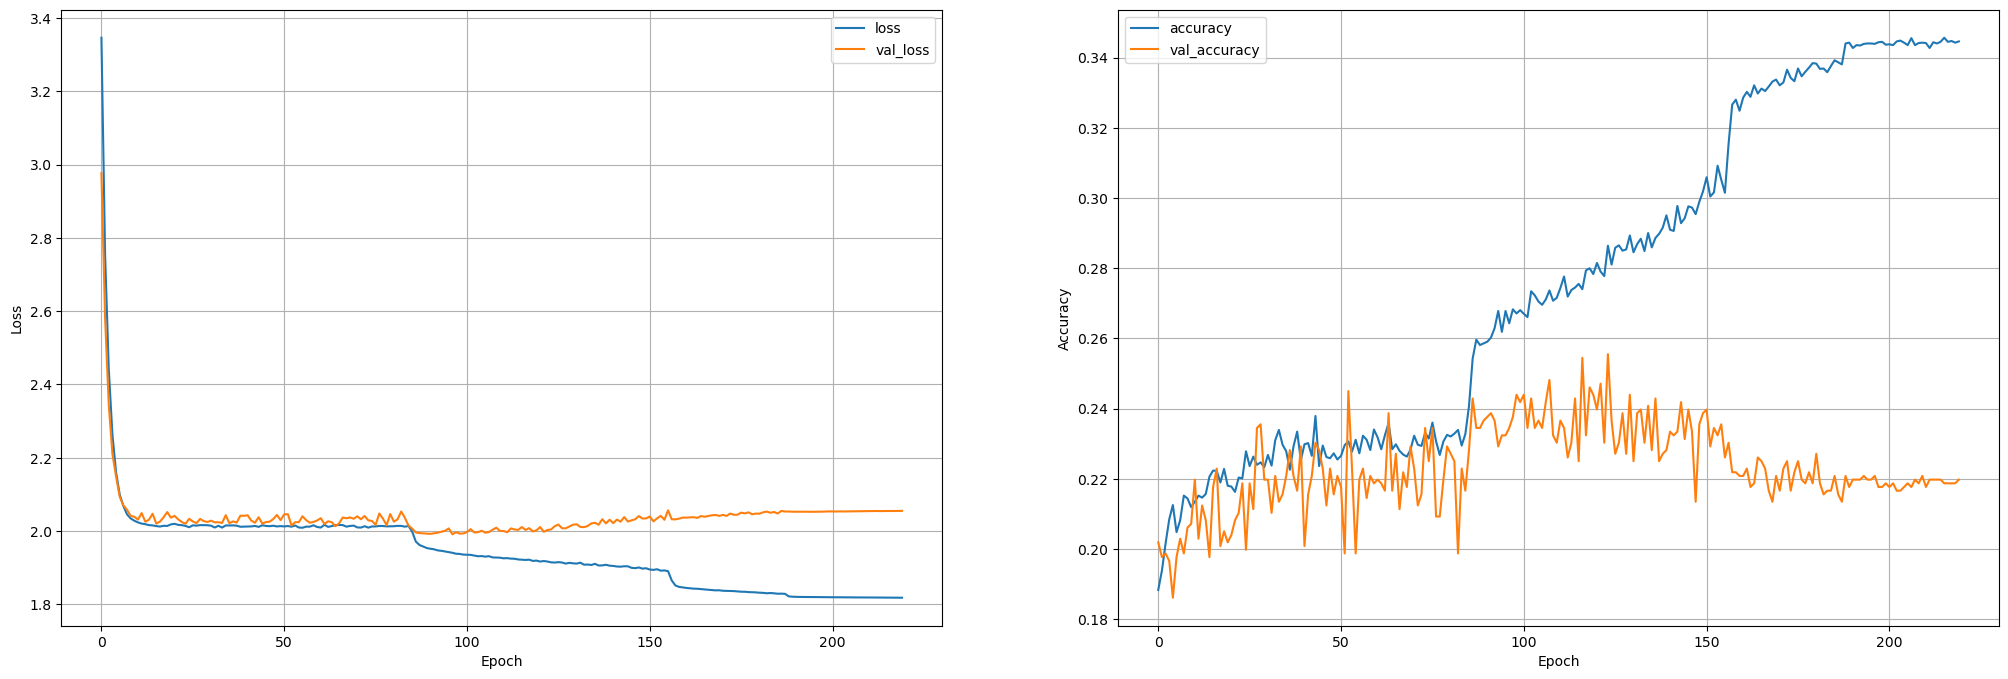

In [9]:
ecg_model = tf.keras.Sequential([
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    layers.Dense(8, activation='softmax')
])

ecg_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

h = ecg_model.fit(
    ecg_data_train,
    labels_train,
    epochs=1000,
    batch_size=64,
    validation_data=(ecg_data_validation, labels_validation),
    callbacks=[early_stop, reduce_lr_cb]
)

plot_results(h)

In [10]:
ecg_predictions = np.argmax(ecg_model.predict(ecg_data_test), axis=1)

ecg_cr = classification_report(labels_test, ecg_predictions, target_names=unique_labels, zero_division=0, digits=4, output_dict=True)
print(classification_report(labels_test, ecg_predictions, target_names=unique_labels, zero_division=0, digits=4))

34/34 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

  Ekscytacja     0.0000    0.0000    0.0000        88
   Neutralna     0.3179    0.5821    0.4112       201
  Odprezenie     0.2500    0.1250    0.1667       112
      Radosc     0.1564    0.1687    0.1623       166
      Smutek     0.0000    0.0000    0.0000        73
      Wstret     0.2487    0.2692    0.2586       182
  Zdziwienie     0.0400    0.0101    0.0161        99
       Zlosc     0.2123    0.3309    0.2586       136

    accuracy                         0.2403      1057
   macro avg     0.1532    0.1857    0.1592      1057
weighted avg     0.1854    0.2403    0.2007      1057



# EDA

Extract only eda related features

In [11]:
eda_columns = [col for col in data.columns if 'EDA' in col or 'SCR' in col]

eda_data_train = data_train[eda_columns]
eda_data_validation = data_validation[eda_columns]
eda_data_test = data_test[eda_columns]

Define the model and train it

Epoch 1/1000
134/134 [==============================] - 1s 5ms/step - loss: 3.4890 - accuracy: 0.1838 - val_loss: 3.0866 - val_accuracy: 0.1903 - lr: 0.1000
Epoch 2/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.8776 - accuracy: 0.1858 - val_loss: 2.6914 - val_accuracy: 0.1903 - lr: 0.1000
Epoch 3/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.5396 - accuracy: 0.1862 - val_loss: 2.4055 - val_accuracy: 0.1903 - lr: 0.1000
Epoch 4/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.3166 - accuracy: 0.1895 - val_loss: 2.2323 - val_accuracy: 0.1893 - lr: 0.1000
Epoch 5/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.1902 - accuracy: 0.1873 - val_loss: 2.1416 - val_accuracy: 0.1861 - lr: 0.1000
Epoch 6/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.1194 - accuracy: 0.1908 - val_loss: 2.0867 - val_accuracy: 0.1882 - lr: 0.1000
Epoch 7/1000
134/134 [==============================] - 0s

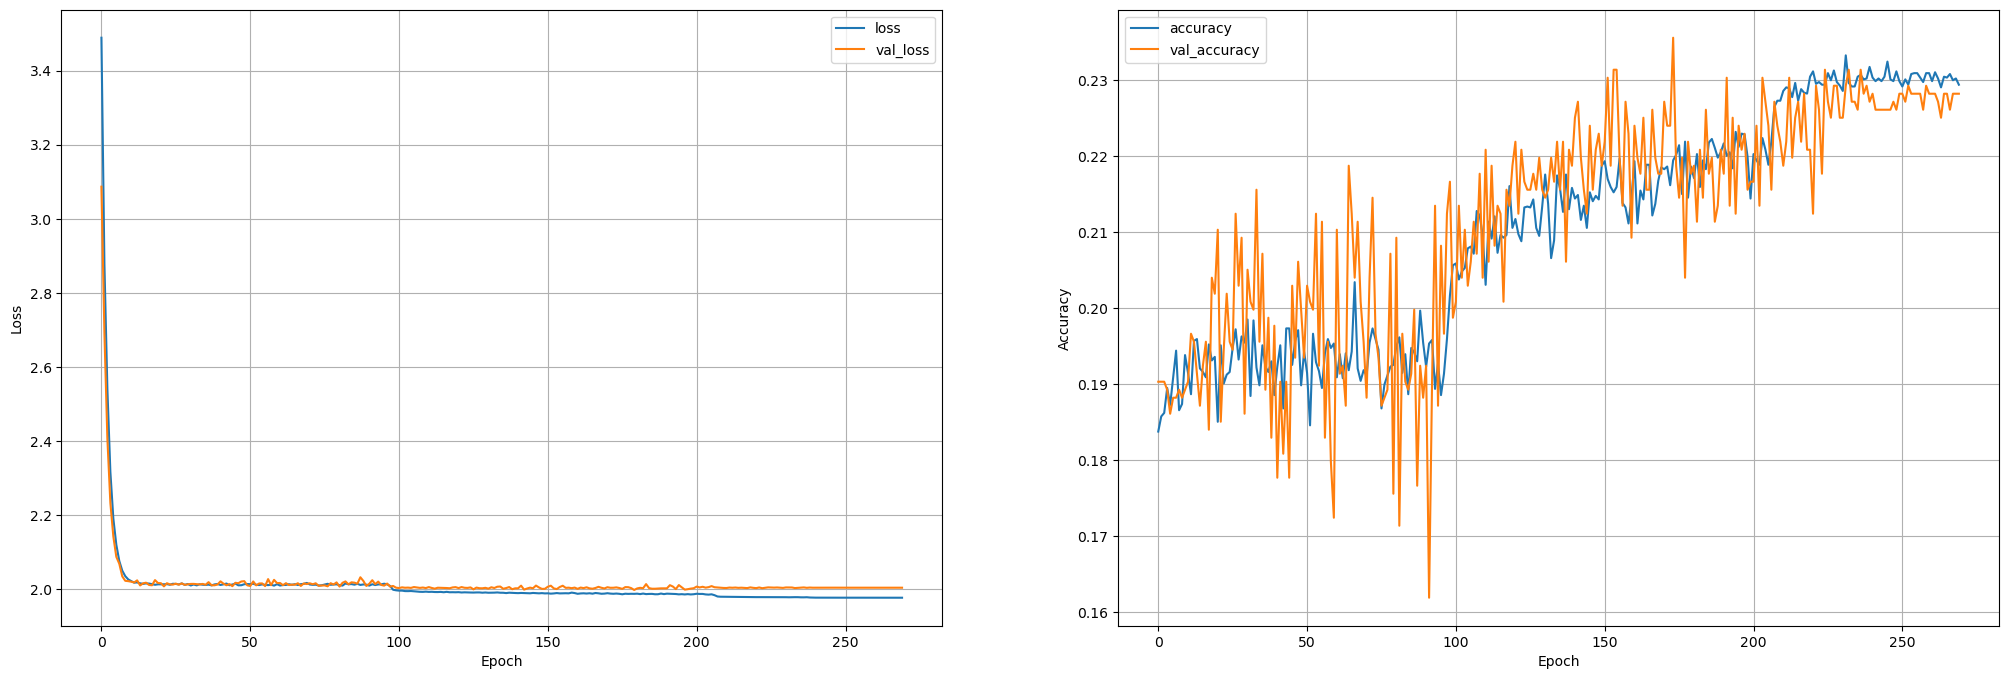

In [12]:
eda_model = tf.keras.Sequential([
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    layers.Dense(8, activation='softmax')
])

eda_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

h = eda_model.fit(
    eda_data_train,
    labels_train,
    epochs=1000,
    batch_size=64,
    validation_data=(eda_data_validation, labels_validation),
    callbacks=[early_stop, reduce_lr_cb]
)

plot_results(h)

In [13]:
eda_predictions = np.argmax(eda_model.predict(eda_data_test), axis=1)

eda_cr = classification_report(labels_test, eda_predictions, target_names=unique_labels, zero_division=0, digits=4, output_dict=True)
print(classification_report(labels_test, eda_predictions, target_names=unique_labels, zero_division=0, digits=4))

34/34 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

  Ekscytacja     0.0000    0.0000    0.0000        88
   Neutralna     0.2710    0.5771    0.3688       201
  Odprezenie     0.2195    0.0804    0.1176       112
      Radosc     0.1538    0.0843    0.1089       166
      Smutek     0.0000    0.0000    0.0000        73
      Wstret     0.1767    0.2747    0.2151       182
  Zdziwienie     0.0000    0.0000    0.0000        99
       Zlosc     0.2103    0.3309    0.2571       136

    accuracy                         0.2214      1057
   macro avg     0.1289    0.1684    0.1335      1057
weighted avg     0.1564    0.2214    0.1698      1057



# Combined

Epoch 1/1000
134/134 [==============================] - 1s 5ms/step - loss: 3.3145 - accuracy: 0.1859 - val_loss: 2.9490 - val_accuracy: 0.1977 - lr: 0.1000
Epoch 2/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.7325 - accuracy: 0.2061 - val_loss: 2.5697 - val_accuracy: 0.1987 - lr: 0.1000
Epoch 3/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.4228 - accuracy: 0.2177 - val_loss: 2.3303 - val_accuracy: 0.2114 - lr: 0.1000
Epoch 4/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.2429 - accuracy: 0.2285 - val_loss: 2.1963 - val_accuracy: 0.2135 - lr: 0.1000
Epoch 5/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.1414 - accuracy: 0.2294 - val_loss: 2.1197 - val_accuracy: 0.2177 - lr: 0.1000
Epoch 6/1000
134/134 [==============================] - 0s 3ms/step - loss: 2.0789 - accuracy: 0.2316 - val_loss: 2.0758 - val_accuracy: 0.2250 - lr: 0.1000
Epoch 7/1000
134/134 [==============================] - 0s

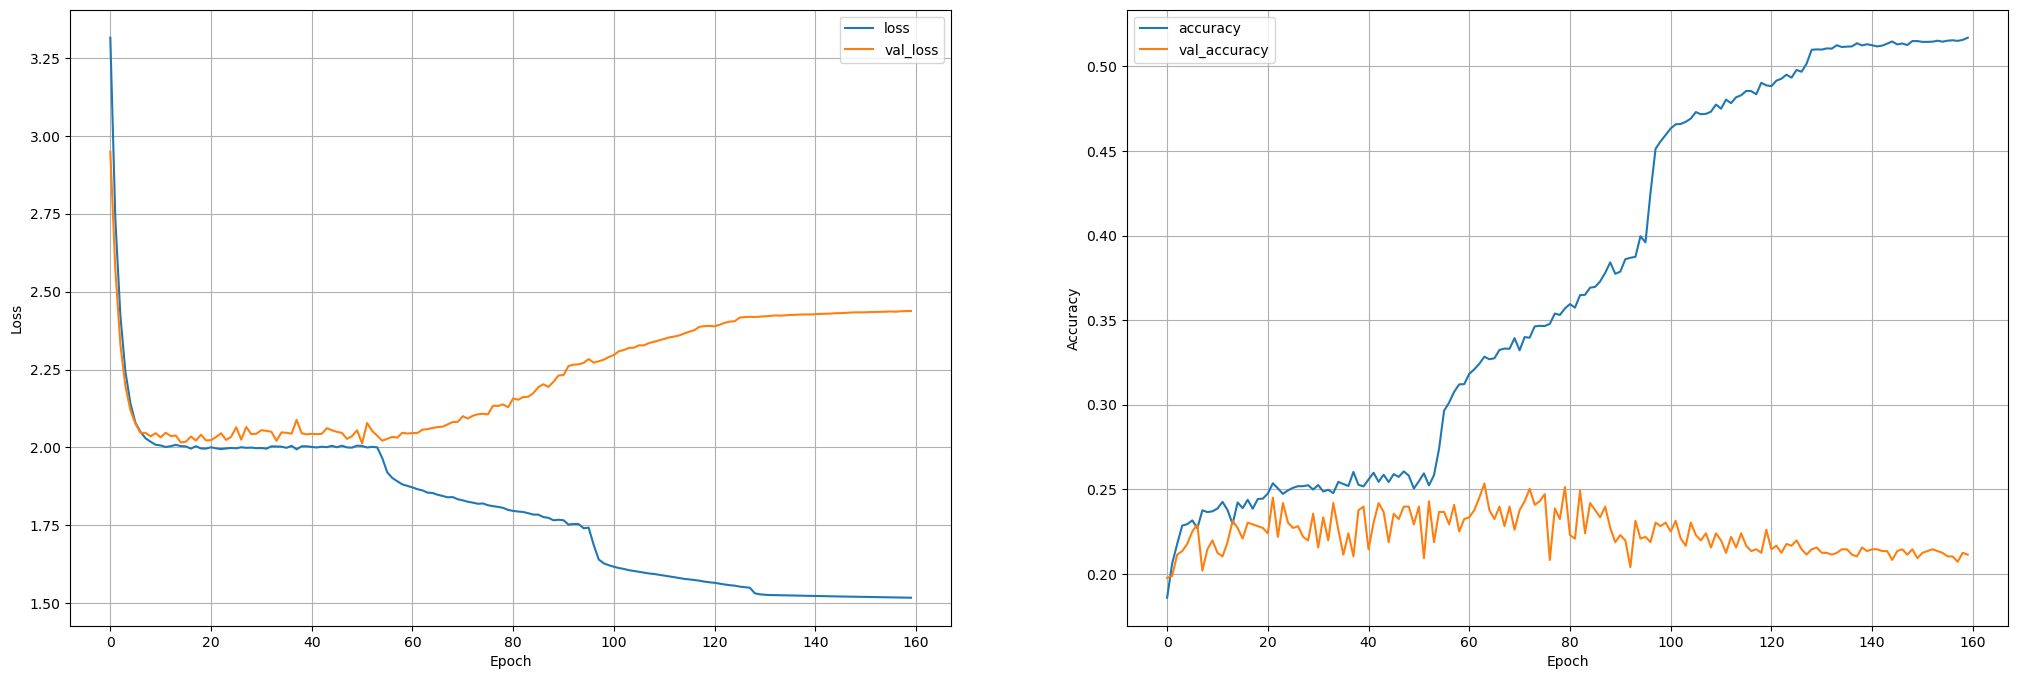

In [14]:
model = tf.keras.Sequential([
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    layers.Dense(8, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

h = model.fit(
    data_train,
    labels_train,
    epochs=1000,
    batch_size=64,
    validation_data=(data_validation, labels_validation),
    callbacks=[early_stop, reduce_lr_cb]
)

plot_results(h)

In [15]:
predictions = np.argmax(model.predict(data_test), axis=1)

cr = classification_report(labels_test, predictions, target_names=unique_labels, zero_division=0, digits=4, output_dict=True)
print(classification_report(labels_test, predictions, target_names=unique_labels, zero_division=0, digits=4))

34/34 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

  Ekscytacja     0.1250    0.0682    0.0882        88
   Neutralna     0.3671    0.5224    0.4312       201
  Odprezenie     0.2639    0.1696    0.2065       112
      Radosc     0.1761    0.1506    0.1623       166
      Smutek     0.2000    0.0137    0.0256        73
      Wstret     0.2009    0.2363    0.2172       182
  Zdziwienie     0.2667    0.0808    0.1240        99
       Zlosc     0.2231    0.4265    0.2929       136

    accuracy                         0.2507      1057
   macro avg     0.2278    0.2085    0.1935      1057
weighted avg     0.2379    0.2507    0.2252      1057



# Summary

In [16]:
print(f'''
  Accuracy:
ECG:\t{ecg_cr['accuracy']:.4f}
EDA:\t{eda_cr['accuracy']:.4f}
Both:\t{cr['accuracy']:.4f}
  Average F1:
ECG:\t{ecg_cr['macro avg']['f1-score']:.4f}
EDA:\t{eda_cr['macro avg']['f1-score']:.4f}
Both:\t{cr['macro avg']['f1-score']:.4f}
  Weighted F1:
ECG:\t{ecg_cr['weighted avg']['f1-score']:.4f}
EDA:\t{eda_cr['weighted avg']['f1-score']:.4f}
Both:\t{cr['weighted avg']['f1-score']:.4f}
''')


  Accuracy:
ECG:	0.2403
EDA:	0.2214
Both:	0.2507
  Average F1:
ECG:	0.1592
EDA:	0.1335
Both:	0.1935
  Weighted F1:
ECG:	0.2007
EDA:	0.1698
Both:	0.2252

